## Read inputs

In [6]:
# Read techno-economic assumptions and transport distances for transport cost calculation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [52]:
tea_lh2 = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='LH2', decimal=',', index_col=0)
tea_lh2

,Ref,LH2,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Properties,,,,,,,,,,,,,,,,,,,,,
Properties - Gas density [kg/m3],BOG 2020,71.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [MJ/kg],BOG 2020,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/kg],https://www.iea-amf.org/content/fuel_informati...,33.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/m3],https://www.rechargenews.com/energy-transitio...,2350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - Boiling point at 1 Bar [°C],NaN,-253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"CAPEX ($/kW-H2), incl. Util.",EWI PTX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"OPEX ($/kW-H2/a), incl. Util.",EWI PTX,NaN,57.69591,57.118951,56.541992,55.965033,55.388074,54.811115,54.234156,53.657197,...,37.646582,36.348424,35.050266,33.752108,32.45395,31.155792,29.857634,28.559476,27.261318,25.96316
Electricity use (kWh/kWh-H2,EWI PTX,0.01,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.01000,0.010000,0.010000,0.010000,0.010000,0.01000


In [53]:
tra_d = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='Transport Distances', decimal=',')
tra_d

,Origin_Country,Destination_Country,sea distance (km),onshore distance (km),offshore distance (km),Starting point
0,United Arab Emirates,Germany,12443.10,NaN,NaN,NaN
1,Angola,Germany,9809.65,NaN,NaN,NaN
2,Argentina,Germany,14063.90,NaN,NaN,NaN
3,Austria,Germany,6005.96,500.0,0.0,NaN
4,Australia,Germany,21212.10,NaN,NaN,NaN
...,...,...,...,...,...,...
955,Philippines,China,1782.35,NaN,NaN,NaN
956,Iceland,China,20454.60,NaN,NaN,NaN
957,Papua New Guinea,China,6298.52,NaN,NaN,NaN
958,Cameroon,China,19717.70,NaN,NaN,NaN


In [54]:
tea_tra = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/tea_tra.csv", delimiter=';', decimal=',')
tea_tra

,Pipelines,Pipeline High,Pipeline Low,Pipeline Retrofit,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Technical Lifetime (y),40.00,40.00,40.00,NaN,NaN,NaN
1,Amortisation factor (%),0.08,0.08,0.08,NaN,NaN,NaN
2,CAPEX (mio$/km),1.21,NaN,NaN,NaN,NaN,NaN
3,CAPEX ($/tpa/km),3.56,1.33,0.73,NaN,NaN,NaN
4,design throughput (kt H2/y),340.00,3400.00,3400.00,NaN,NaN,NaN
5,real throughput (kt H2/y),255.00,NaN,NaN,NaN,NaN,NaN
6,OPEX & Fuel (% of CAPEX/a),0.05,0.05,0.05,NaN,NaN,NaN
7,utilisation (%),0.75,0.75,0.75,NaN,NaN,NaN
8,Cost of pipeline transport ($/1000km/kg H2),0.64,0.24,0.13,NaN,NaN,NaN
9,Interest rate (%),0.08,0.08,0.08,NaN,NaN,NaN


In [55]:
# Electrcity wholesale price projections in $_2018/MWh from DNVGL 2018
p_electricity = pd.read_excel('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx', sheet_name='EL Price', decimal=',', index_col=0)
p_electricity

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Wholesale electricity prices from DNV GL 2019,,,,,,,,,,,,,,,,,,,,,
United Arab Emirates,36.301651,36.764515,37.137776,37.447974,37.747898,38.034395,38.325658,38.655501,39.015448,39.420264,...,53.573530,51.487746,50.336783,49.802097,49.984233,50.739234,51.993049,53.655694,54.814324,56.468935
Angola,121.494032,119.445089,119.580409,124.653779,131.547459,137.405324,141.246042,142.819290,143.098086,143.128137,...,167.313461,168.277022,168.972257,169.434972,169.825687,170.198308,170.217476,170.039948,170.172216,169.924801
Argentina,37.961027,38.086072,39.032196,40.033404,41.148255,42.353416,43.577189,44.818521,46.021991,47.209332,...,73.409441,72.994100,72.420411,72.137700,71.884240,71.715794,71.547577,71.579187,70.985088,71.383909
Austria,46.683533,47.002654,47.209289,47.346703,47.274782,46.957092,46.416301,46.118220,45.738344,45.399899,...,49.609330,50.705430,51.925184,53.193310,54.221220,54.704721,54.535295,53.994557,53.715329,53.994428
Australia,72.846428,69.396730,66.622798,64.898776,64.515503,64.897234,65.154315,65.256396,65.134265,64.811898,...,38.939740,37.412280,35.994851,34.709238,33.678074,32.794352,32.137023,31.647242,30.594356,29.930791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Philippines,42.402642,44.089299,45.936088,47.946139,50.057150,52.193834,54.433745,57.196590,60.841314,65.569751,...,75.383730,74.831710,74.676203,74.735059,74.746313,74.583895,74.409350,74.323923,74.282002,73.996739
Iceland,46.683533,47.002654,47.209289,47.346703,47.274782,46.957092,46.416301,46.118220,45.738344,45.399899,...,49.609330,50.705430,51.925184,53.193310,54.221220,54.704721,54.535295,53.994557,53.715329,53.994428
Papua New Guinea,42.402642,44.089299,45.936088,47.946139,50.057150,52.193834,54.433745,57.196590,60.841314,65.569751,...,75.383730,74.831710,74.676203,74.735059,74.746313,74.583895,74.409350,74.323923,74.282002,73.996739


In [56]:
lcoh_green = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='LCOH_RES', decimal=',', index_col=0)
lcoh_green

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
United_Arab_Emirates_Onshore_3_low_temp_baseline,7.083424,6.891298,6.715543,6.552560,6.399783,6.255316,6.117722,5.985886,5.858925,5.736129,...,4.691380,4.628208,4.566471,4.512363,4.403312,4.338001,4.274817,4.213586,4.154154,4.096389
United_Arab_Emirates_Offshore_1_low_temp_baseline,11.470109,11.104346,10.787404,10.505314,10.249265,10.013359,9.793456,9.586545,9.390367,9.203187,...,7.248224,7.116204,6.992261,6.880684,6.719989,6.607285,6.500267,6.398248,6.300666,6.207051
United_Arab_Emirates_Offshore_2_low_temp_baseline,15.518520,15.026419,14.603391,14.229709,13.892937,13.584745,13.299293,13.032333,12.780680,12.541890,...,9.892514,9.713566,9.545998,9.395894,9.176013,9.024151,8.880277,8.743419,8.612779,8.487690
United_Arab_Emirates_PV_2_low_temp_baseline,3.990183,3.815470,3.659375,3.516671,3.384029,3.259207,3.140629,3.027147,2.917901,2.812232,...,2.123259,2.077646,2.033698,1.995168,1.933859,1.891448,1.850562,1.811050,1.772783,1.735653
United_Arab_Emirates_PV_3_low_temp_baseline,4.167158,3.984340,3.821167,3.672128,3.533712,3.403554,3.279992,3.161815,3.048116,2.938202,...,2.218239,2.170581,2.124678,2.084494,2.020231,1.975935,1.933247,1.892006,1.852079,1.813348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South_Africa_PV_4_low_temp_optimistic,4.776238,4.522432,4.311259,4.130247,3.971568,3.830018,3.701980,3.584849,3.476693,3.376044,...,2.316135,2.243911,2.174816,2.115768,2.014671,1.948563,1.885225,1.824345,1.765661,1.708951
South_Africa_Onshore_3_high_temp_optimistic,6.957099,6.651531,6.361605,6.082880,5.812121,5.546874,5.285203,5.025533,4.766533,4.507054,...,3.527896,3.479815,3.432700,3.392380,3.300107,3.248513,3.198556,3.150082,3.102956,3.057060
South_Africa_Offshore_1_high_temp_optimistic,6.420926,6.101068,5.807786,5.532832,5.271000,5.018783,4.773702,4.533933,4.298081,4.065056,...,3.044944,2.985666,2.930034,2.880146,2.806048,2.755060,2.706577,2.660273,2.615880,2.573177


In [67]:
# WACC for all transport investments (pipelines, terminals, liquefaction plants)
i_tra = float(tea_lh2.loc['Liquefaction - Discount rate [%]']['LH2'])
i_tra

0.05

# Liquefaction

In [68]:
# WACC for liquefaction plant in %
i_liq = float(tea_lh2.loc['Liquefaction - Discount rate [%]']['LH2'])
i_liq

0.05

In [69]:
# Economic lifetime for the liquefaction plant [years]
l_liq = float(tea_lh2.loc['Liquefaction - Lifetime [Years]']['LH2'])
l_liq

30.0

In [70]:
# Amortisation factor alpha for the liquefaction plant
alpha_liq = (i_liq * (1 + i_liq) ** l_liq) /(((1 + i_liq) ** l_liq) - 1)
alpha_liq


0.06505143508027657

In [71]:
opex_liq_share = float(tea_lh2.loc['Liquefaction - Opex opt. [% of Capex]']['LH2'])
opex_liq_share

0.04

In [72]:
p_el_y = float(p_electricity.loc['Norway'][2025])
p_el_y

46.9570923511

Calc. liquefaction cost
alpha
capex_liq_y Liquefaction - Capex opt. [€/kW]
opex_liq_y Liquefaction - opex in [€/kW/a]
electricity use [kwh/kg H2]
electricity price [$/MWh]

In [73]:
# Definition of the cost calculation function for liquefaction costs. Time relevant variables = capex [€/tpa], opex [€/tpa],
def calculate_liq_costs(alpha_liq, capex_liq_y, opex_liq_y, el_liq_y, p_el_y):

    result = float((alpha_liq * capex_liq_y/8760 + opex_liq_y/8760) + el_liq_y  * p_el_y*0.89/1000)

    return result

In [74]:
opex_liq_y = float(tea_lh2.loc['Liquefaction - Capex opt. [€/kW]'][2030]) * opex_liq_share
opex_liq_y

70.41620400000001

In [75]:
# Calculation of liquefaction costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['LH2_Liquefaction_costs'])
result.index.name = 'Years'

for year in years:

    # get capex, opex, natural gas price and CO2 price of specific year
    capex_liq_y = float(tea_lh2.loc['Liquefaction - Capex opt. [€/kW]'][year])
    opex_liq_y = float(tea_lh2.loc['Liquefaction - Capex opt. [€/kW]'][year]) * opex_liq_share
    el_liq_y = float(tea_lh2.loc['Liquefaction - Electricity consumption opt. [kWh/kgH2]'][year]) / 33.33
    p_el_y = float(p_electricity.loc['Norway'][year])

    # calculate costs of specific year
    result.LH2_Liquefaction_costs.loc[year] = calculate_liq_costs(alpha_liq=alpha_liq, capex_liq_y=capex_liq_y, opex_liq_y=opex_liq_y, el_liq_y=el_liq_y, p_el_y=p_el_y)

result

,LH2_Liquefaction_costs
Years,
2025,0.036464
2026,0.035278
2027,0.034149
2028,0.033004
2029,0.03187
2030,0.030753
2031,0.029704
2032,0.028707
2033,0.027777


In [76]:
# Create csv file from results dataframe
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv,'LH2_Liquefaction_costs.csv')
result.to_csv(output_file, sep = ';')

Plot liquefaction costs

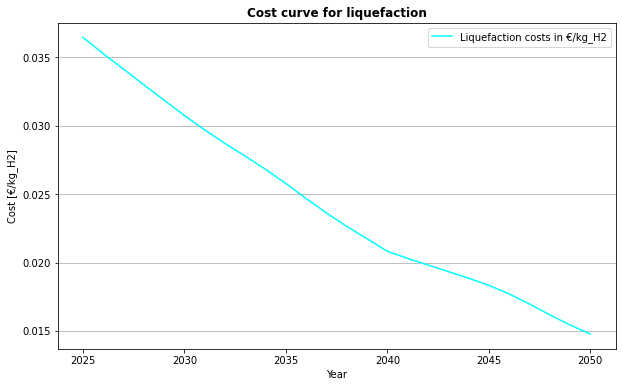

In [77]:
# Plot cost curve for liquefaction
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'cyan', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for liquefaction', fontweight = 'bold')
plt.legend(['Liquefaction costs in €/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost [€/kg_H2]')
plt.show()

# Export terminal

In [78]:
# Lifetime of import and export terminals
l_ter = float(tea_lh2.loc['Export Terminal - Technical lifetime [Years]']['LH2'])
# Amortisation factor for the export terminal
alpha_et = (i_tra * (1 + i_tra) ** l_ter) / (((1 + i_tra) ** l_ter) - 1)
# Average storage time in the export terminal tanks in days
t_et = float(tea_lh2.loc['Export Terminal - Storage length per load [Days]']['LH2'])
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et = float(tea_lh2.loc['Export Terminal - Electricity use [kWh/kgH2]']['LH2'])
el_et
# Boil-off hydrogen in [%/day]
bog_et = float(tea_lh2.loc['Export Terminal - Boil off rate [%/day]']['LH2'])
bog_et
# Average storage time in the export terminal tanks in days
t_et = float(tea_lh2.loc['Export Terminal - Storage length per load [Days]']['LH2'])
t_et
el_reliq = float(tea_lh2.loc['Export Terminal - Energy use to reliquefy opt. [kWh/kg H2/day]']['LH2'])
el_reliq
opex_et_share = float(tea_lh2.loc['Export Terminal - Annual OPEX [% of CAPEX]']['LH2'])


In [79]:
# Cost of transported hydrogen in [$/kg_h2] in year y
lcoh_ngr = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LCOH_NGR.csv", delimiter=';', decimal=',', index_col=0)
lcoh_ngr

,LCOH_BLUE
Years,
2025,1.5489534708990411
2026,1.5406507382782189
2027,1.5325377955873973
2028,1.5246229991465754
2029,1.516915073465753
2030,1.5094231270849314
2031,1.513193191482329
2032,1.517277505408356
2033,1.521682492908082


Calc. export terminal cost

In [80]:
# Definition of the cost calculation function for the Export terminal.
# Time relevant variables = capex [$/tpa], opex [$/tpa], electricity use [kwh/kg H2], electricity price [$/MWh], boil off in [%/d], storage time in days, lcoh in [$/kg_h2]
def calculate_export_terminal_costs(alpha_et, capex_et_y, opex_et_y, el_et, p_el_y, lcoh_ngr_y):
    result = (alpha_et * capex_et_y/1000 + opex_et_y/1000) + el_et * p_el_y*0.89/1000 + bog_et * t_et * lcoh_ngr_y

    return result

In [81]:
#Calculation of export terminal costs [$/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Export_terminal_costs'])
result.index.name = 'Years'

In [82]:
for year in years:
    # get capex, opex, xx
    capex_et_y = float(tea_lh2.loc['Export Terminal - CAPEX/tank [€/t/a]'][year])
    opex_et_y = float(tea_lh2.loc['Export Terminal - Annual OPEX [% of CAPEX]'][year])
    p_el_y = float(p_electricity.loc['Norway'][year])
    lcoh_ngr_y = float(lcoh_ngr.loc[year]['LCOH_BLUE'])

    # calculate costs of specific year
    result.LH2_Export_terminal_costs.loc[year] = calculate_export_terminal_costs(alpha_et=alpha_et, capex_et_y=capex_et_y,
                                                              opex_et_y=opex_et_y, el_et=el_et, p_el_y=p_el_y, lcoh_ngr_y=lcoh_ngr_y)

result

,LH2_Export_terminal_costs
Years,
2025,0.191192
2026,0.18921
2027,0.187361
2028,0.18547
2029,0.183602
2030,0.181775
2031,0.178162
2032,0.174685
2033,0.171394


In [83]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LH2_Export_terminal_costs.csv')
result.to_csv(output_file, sep=';')

Plot export terminal costs

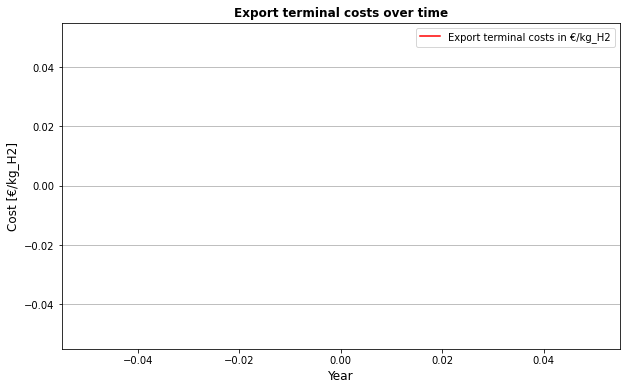

In [51]:
# Plot cost curve for export terminal costs
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'red', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='red', linestyle='dashed')
plt.title('Export terminal costs over time', fontweight='bold', fontsize='large')
plt.legend(['Export terminal costs in €/kg_H2'])
plt.xlabel('Year', fontsize='large')
plt.ylabel('Cost [€/kg_H2]', fontsize='large')
plt.show()

# Shipping

In [519]:
# Technical lifetime of ships in years
l_ship = float(tea_lh2.loc['Shipping - Technical Lifetime [Years]']['LH2'])
l_ship

30.0

In [520]:
# Amortisation factor for shipping
alpha_ship = (i_tra * (1 + i_tra) ** l_ship) / (((1 + i_tra) ** l_ship) - 1)
alpha_ship


0.08882743338727227

In [521]:
# Distance between countries via ship in [km]
d_sea = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['sea distance (km)'].values)
d_sea


602.403

In [522]:
# Ship speed in [km/h]
v_ship = float(tea_lh2.loc['Shipping - Ship speed [km/h]']['LH2'])
v_ship

30.0

In [523]:
# Berthing time (time for unloading and loading in a harbour) in [h]
h_ship = float(tea_lh2.loc['Shipping - Berthing time [hours]']['LH2'])
h_ship


48.0

In [524]:
# Boil-off when shipping in [%/day] to [%/hour]
bog_ship = float(tea_lh2.loc['Shipping - Boil off opt. [%/day]']['LH2'])/24
bog_ship

8.333333333333333e-05

In [525]:
# Fuel consumption of a ship in [kg_h2/t/km]
f_ship = float(tea_lh2.loc['Shipping - Fuel use [kg H2/t/km]']['LH2'])/1000
f_ship

1.1268181818181817e-05

Calc. shipping costs @ 10.000km

In [526]:
d_sea = 10000

Definition of the cost calculation function for the maritime shipping.
 [%]
d_sea [km]
v_ship [km/h]
h_ship [h] berthing time
bog_ship [%/day]
f_ship [kg/kg/km]] Fuel use
Time relevant variables:
capex [€/kg/a]
opex [€/kg/a]
lcoh in [€/kg_h2]

In [527]:
def calculate_ship_costs(alpha_ship, capex_ship_y, opex_ship_y, d_sea, v_ship, h_ship, bog_ship, f_ship, lcoh_ngr_y):
    result = (alpha_ship * capex_ship_y + opex_ship_y) / (8760/(2*(d_sea/v_ship + h_ship)))\
             /(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea))\
             + (bog_ship * d_sea/v_ship + f_ship * d_sea) * lcoh_ngr_y

    return result

In [528]:
# Calculation of shipping costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Shipping_costs'])
result.index.name = 'Years'

for year in years:
    # get capex, opex, xx
    capex_ship_y = float(tea_lh2.loc['Shipping - Capex/Ship opt. [€/t/a]'][year])/1000
    opex_ship_y = float(tea_lh2.loc['Shipping - Annual Opex opt. [€/t/a]'][year])/1000
    lcoh_ngr_y = float(lcoh_ngr.loc[year]['LCOH_BLUE'])

    # calculate costs of specific year
    result.LH2_Shipping_costs.loc[year] = calculate_ship_costs(alpha_ship=alpha_ship, capex_ship_y=capex_ship_y, opex_ship_y=opex_ship_y, d_sea=d_sea, v_ship=v_ship, h_ship=h_ship, bog_ship=bog_ship, f_ship=f_ship, lcoh_ngr_y=lcoh_ngr_y)

result

,LH2_Shipping_costs
Years,
2025,2.021315
2026,1.928708
2027,1.836128
2028,1.743575
2029,1.651052
2030,1.558559
2031,1.467648
2032,1.376781
2033,1.285959


In [529]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LH2_Shipping_costs.csv')
result.to_csv(output_file, sep=';')

Plot shipping costs

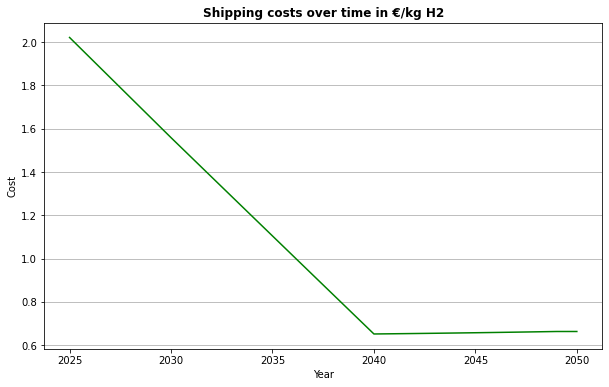

In [530]:
# Plot cost curve of hydrogen production from NGR with CCS
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'green', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Shipping costs over time in €/kg H2', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

# Import terminal

In [531]:
# Definition of variables for the import terminal costs

In [532]:
# Amortisation factor for the import terminal
alpha_it = alpha_et

In [533]:
# Electricity consumption in kWh/kg H2
el_it = float(tea_lh2.loc['Import Terminal - Electricity use [kWh/kg H2]']['LH2'])
el_it

0.2

In [534]:
# Import terminal boil-off in [%/day]
bog_it = float(tea_lh2.loc['Import Terminal - Boil-off [%/day]']['LH2'])
bog_it

0.001

In [535]:
# Average storage time in the export terminal tanks in days
t_it = float(tea_lh2.loc['Import Terminal - Storage length per load [days]']['LH2'])
t_it

7.0

In [536]:
# Import terminal costs in [$/kg_h2]:
# Capex for the import terminal in [$/tpa]
# Opex for the import terminal in [$/tpa]
# Electricity consumption for the import terminal in [kWh/kg_h2]
# Price for electricity in importing country [$/MWh]
# Import terminal boil-off in [%/h]
# Berthing time in import terminal in [h]
# Cost of transported hydrogen in [$/kg_h2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Import_terminal_costs'])
result.index.name = 'Years'

def calculate_import_terminal_costs(alpha_it, capex_it_y, opex_it_y, bog_it, t_it, lcoh_ngr_y):
    result = (alpha_it * capex_it_y/1000 + opex_it_y/1000) + bog_it * t_it * lcoh_ngr_y

    return result

In [537]:
for year in years:
    # get capex, opex, xx
    capex_it_y = float(tea_lh2.loc['Import Terminal - CAPEX [€/t/a]'][year])
    opex_it_y = float(tea_lh2.loc['Import Terminal - OPEX [€/t/a]'][year])
    p_el_y = float(p_electricity.loc['Germany'][year])
    lcoh_ngr_y = float(lcoh_ngr.loc[year]['LCOH_BLUE'])

    # calculate costs of specific year
    result.LH2_Import_terminal_costs.loc[year] = calculate_import_terminal_costs(alpha_it=alpha_it, capex_it_y=capex_it_y, opex_it_y=opex_it_y, bog_it=bog_it, t_it=t_it, lcoh_ngr_y=lcoh_ngr_y)

result

,LH2_Import_terminal_costs
Years,
2025,0.199142
2026,0.197102
2027,0.195063
2028,0.193025
2029,0.190989
2030,0.188955
2031,0.184521
2032,0.18009
2033,0.175661


In [538]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LH2_Import_terminal_costs.csv')
result.to_csv(output_file, sep=';')

Plot import terminal costs

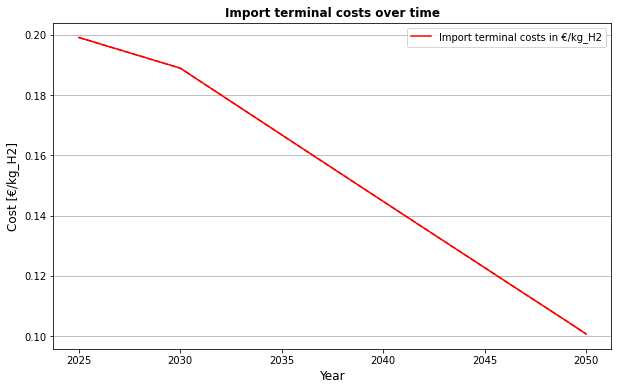

In [539]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'red', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='red', linestyle='dashed')
plt.title('Import terminal costs over time', fontweight='bold', fontsize='large')
plt.legend(['Import terminal costs in €/kg_H2'])
plt.xlabel('Year', fontsize='large')
plt.ylabel('Cost [€/kg_H2]', fontsize='large')
plt.show()

# Reconversion

In [540]:
# Economic lifetime for the reconversion plant [years]
l_recon = float(tea_lh2.loc['Reconversion - Lifetime [Years]']['LH2'])
l_recon


KeyError: 'Reconversion - Lifetime [Years]'

In [541]:
# Amortisation factor alpha for the reconversion plant
alpha_recon =  alpha_it


In [542]:
# Price for electricity in Importing country [$/MWh]
p_el_y = float(p_electricity.loc['Germany'][2025])
p_el_y


46.9570923511

In [543]:
# Electricty consumption for the conversion in [kWh/kg_h2]
el_recon = float(tea_lh2.loc['Import Terminal - Electricity use [kWh/kg H2]']['LH2'])
el_recon

0.2

In [544]:
def calculate_recon_costs(alpha_recon, capex_recon_y, opex_recon_y, el_recon_y, p_el_y):
    result = float(
        (alpha_recon * capex_recon_y / 1000 + opex_recon_y / 1000) + el_recon_y * p_el_y / 1000 * 0.89)
    return result


# Calculation of conversion costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Reconversion_costs'])
result.index.name = 'Years'

In [545]:
for year in years:
    # get capex, opex, natural gas price and CO2 price of specific year
    capex_recon_y = float(tea_lh2.loc['Reconversion - Capex opt. [€/t/a]'][year])
    opex_recon_y = float(tea_lh2.loc['Reconversion - Opex opt. [€/t/a]'][year])
    el_recon_y = float(tea_lh2.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
    p_el_y = float(p_electricity.loc['Germany'][year])

    # calculate costs of specific year
    result.LH2_Reconversion_costs.loc[year] = calculate_recon_costs(alpha_recon=alpha_recon, capex_recon_y=capex_recon_y,
                                                                opex_recon_y=opex_recon_y, el_recon_y=el_recon_y,
                                                                p_el_y=p_el_y)
result

,LH2_Reconversion_costs
Years,
2025,0.231663
2026,0.221298
2027,0.211095
2028,0.200856
2029,0.190654
2030,0.180501
2031,0.170524
2032,0.160666
2033,0.150961


In [546]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LH2_Reconversion_costs.csv')
result.to_csv(output_file, sep=';')

# LH2 transport costs

In [547]:
liq_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Liquefaction_costs.csv', delimiter=';', decimal=',')
et_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Export_terminal_costs.csv', delimiter=';', decimal=',')
ship_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Shipping_costs.csv', delimiter=';', decimal=',')
it_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Import_terminal_costs.csv', delimiter=';', decimal=',')
recon_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Reconversion_costs.csv', delimiter=';', decimal=',')

In [548]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_transport'])
result.index.name = 'Years'

In [549]:
# Calculate total transport costs from liquefaction costs (LC), export terminal costs (EC), Shipping costs (SC), import terminal costs (IC)
def calculate_seaborne_transport_costs():
    result = LC + EC + SC + IC + RC

    return result

In [550]:
for year in years:
    # get all costs
    LC = float(liq_costs[liq_costs.Years == year]['LH2_Liquefaction_costs'])
    EC = float(et_costs[et_costs.Years == year]['LH2_Export_terminal_costs'])
    SC = float(ship_costs[ship_costs.Years == year]['LH2_Shipping_costs'])
    IC = float(it_costs[it_costs.Years == year]['LH2_Import_terminal_costs'])
    RC = float(recon_costs[recon_costs.Years == year]['LH2_Reconversion_costs'])
    # calculate costs of specific year
    result.LH2_transport.loc[year] = calculate_seaborne_transport_costs()

result

,LH2_transport
Years,
2025,3.973655
2026,3.820867
2027,3.67029
2028,3.519119
2029,3.368404
2030,3.218386
2031,3.06915
2032,2.921914
2033,2.777323


In [551]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LH2_transport_costs.csv')
result.to_csv(output_file, sep=';')

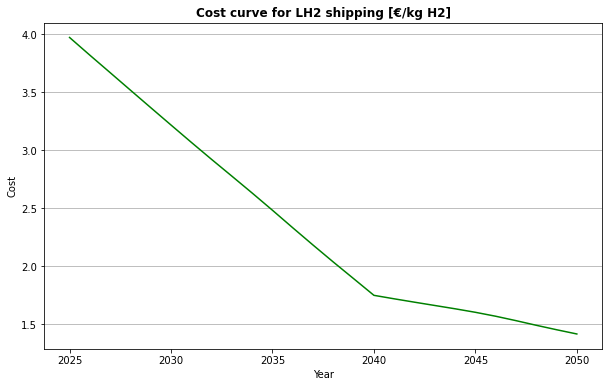

In [552]:
# Plot cost curve for seaborne transport
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'green', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for LH2 shipping [€/kg H2]', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

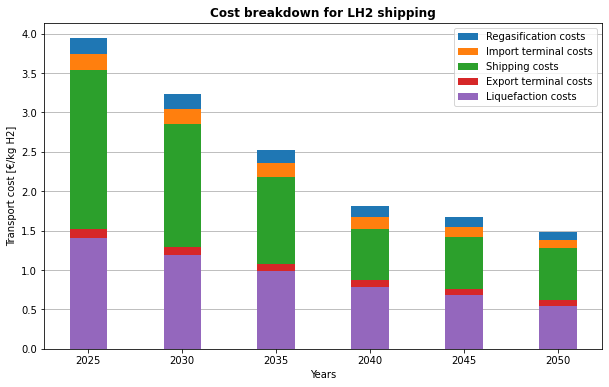

In [553]:
# Cost breakdown for LH2 shipping
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)
LC = (liq_costs.loc[::5]['LH2_Liquefaction_costs']).apply(pd.to_numeric)
EC = (et_costs.loc[::5]['LH2_Export_terminal_costs']).apply(pd.to_numeric)
SC = (ship_costs.loc[::5]['LH2_Shipping_costs']).apply(pd.to_numeric)
IC = (it_costs.loc[::5]['LH2_Import_terminal_costs']).apply(pd.to_numeric)
RC = (recon_costs.loc[::5]['LH2_Reconversion_costs']).apply(pd.to_numeric)
width = 2       # the width of the bars: can also be len(x) sequence

RC_plt = plt.bar(x,IC, width, label='Regasification costs', bottom= LC + EC + SC + IC)
IC_plt = plt.bar(x,IC, width, label='Import terminal costs', bottom= LC + EC + SC)
SC_plt = plt.bar(x,SC, width, label='Shipping costs', bottom= LC + EC)
EC_plt = plt.bar(x,EC, width, label='Export terminal costs', bottom= LC)
LC_plt = plt.bar(x,LC, width, label='Liquefaction costs')

plt.title('Cost breakdown for LH2 shipping', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Transport cost [€/kg H2]')
plt.xlabel('Years')
plt.show()

Higher import terminal costs because of longer storage time in tanks: IC = 7 days, EC = 3 days

# Total transport costs

In [554]:
# Costs for seaborne transport via ship [€/kg_h2]
sea_costs = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Seaborne_transport_costs.csv', delimiter=';', decimal=',')
sea_costs

,Years,LNH3_transport
0,2025,1.9201019599886755
1,2026,1.8799270542902833
2,2027,1.844374388410312
3,2028,1.8077390024857476
4,2029,1.7721397230551235
5,2030,1.7380350257639852
6,2031,1.7091189244229992
7,2032,1.684054438277494
8,2033,1.6638912374460828
9,2034,1.6415578982947414


In [555]:
def choose_minimal_transport_costs(TC_pipe_high,TC_sea):
    result = min(TC_pipe_high, TC_sea)

    return result

In [556]:
years = np.arange(2020, 2051)
result = pd.DataFrame(index=years, columns=['Minimal_transport_costs'])
result.index.name = 'Years'

for year in years:
    # get all costs
    TC_sea = float(sea_costs[sea_costs.Years == year]['Seaborne_transport_costs'])

    # calculate costs of specific year
    result.Minimal_transport_costs.loc[year] = choose_minimal_transport_costs(TC_pipe_high=TC_pipe_high,TC_sea=TC_sea)

result

KeyError: 'Seaborne_transport_costs'

In [557]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Minimal_transport_costs.csv')
result.to_csv(output_file, sep=';')

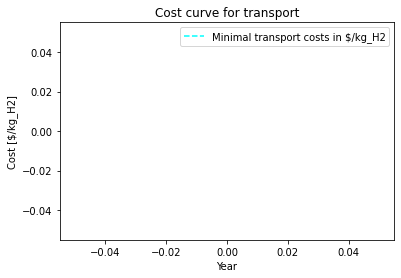

In [449]:
# Plot cost curve for seaborne transport
plt.plot(result, color='cyan', linestyle='dashed')
plt.title('Cost curve for transport')
plt.legend(['Minimal transport costs in $/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost [$/kg_H2]')
plt.show()